# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [12]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [14]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [15]:
# Rename all the columns to lower case
df.columns= df.columns.str.lower()

In [16]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [17]:
# Change the index to 'linename'
df.set_index('linename')

df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [18]:
# Reset the index
df = df.reset_index()

df.head()


,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [19]:
# https://github.com/Makster04/NYC_DS_010625/blob/main/Phase1_PandasBasics_Part2/Ph1_T4_4_Pandas_Altering_Datastructures.ipynb
# Add a new 'num_lines' column
df.columns = df.columns.str.strip()
df['Num_Lines'] = df['entries']+df['exits']

df_sorted = df.sort_values(by= 'Num_Lines', ascending=False)


df_sorted.head()

,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
92354,92354,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,08/31/2018,20:00:00,REGULAR,1923956725,2037283973,3961240698
92353,92353,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,08/31/2018,16:00:00,REGULAR,1923955468,2037283848,3961239316
92352,92352,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,08/31/2018,12:00:00,REGULAR,1923954470,2037283470,3961237940
92351,92351,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,08/31/2018,08:00:00,REGULAR,1923954268,2037282080,3961236348
92350,92350,N501,R020,01-03-02,47-50 STS ROCK,BDFM,IND,08/31/2018,04:00:00,REGULAR,1923954226,2037281705,3961235931


Write a function to clean column names: 

In [20]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

In [21]:
def clean(level_0):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = df.columns.str.replace('level_0', 'level')
    return cleaned

In [22]:
# Use the above function to clean the column names
df.head()

,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,9019251
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,9019275
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,9019334
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,9019494
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,9019733


In [23]:
# Check to ensure the column names were cleaned
df.columns

Index(['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [29]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()


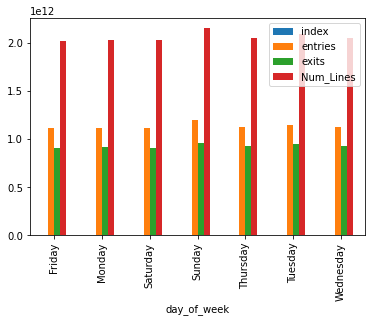

In [33]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='bar')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [42]:
# Reset the index of grouped
grouped = df.reset_index(drop=True)

# Print the first five rows of grouped
df.head(5)


,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,9019251,Saturday
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,9019275,Saturday
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,9019334,Saturday
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,9019494,Saturday
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,9019733,Saturday


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [45]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

IndexError: index 0 is out of bounds for axis 0 with size 0

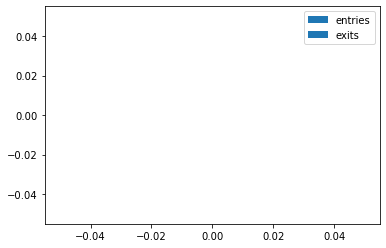

In [44]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

You practiced your data cleanup skills using Pandas.